In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

### Import data

In [2]:
df = pd.read_csv('results_2021.csv', header=1)

In [3]:
# only use lines with valid serial numbers
df = df[df['Serial #'] > 0]
keys = np.array(list(df.keys()))
print(df.shape)

(1141, 246)


### Map to questions

In [4]:
# following https://github.com/todogroup/osposurvey/blob/master/2021/questions.md
parts_to_qs = {
    '1': [1,2,3,4,5,6],
    '2a': [7,8],
    '2b': [9],
    '2c': [10,11,12,13,14,15,16,17,18,19,20],
    '2d': [21],
    '3': [22,23,24,25,26],
    '4a': [27,28],
    '4b': [29,30],
    '4c': [31],
    '5a': [32,33,34,35,36,37],
    '5b': [38],
    '5c': [39],
    '6': [40,41,42],
    '7': [43,44,45,46,47],
    '8': [48,49,50]
}

In [5]:
# offset = 0
# [print(i+offset,k) for i,k in enumerate(keys[offset:])]
# pass

In [6]:
qs_to_cols = {
    1: [8,9,10,11,12,13,14],
    2: [15],
    3: [16,17,18,19,20,21,22],
    4: [23],
    5: [24,25,26,27,28],
    6: [29],
    7: [30,31,32,33,34,35,36,37,38,39,40],
    8: [41],
    9: [42],
    10: [43,44],
    11: [45,46,47,48,49,50],
    12: [51,52],
    13: [53],
    14: [54],
    15: [55,56,57,58,59,60,61,62,63,64,65,66,67,68,69],
    16: [70,71,72,73,74,75,76,77,78,79,80,81,82,83,84],
    17: [85,86,87,88,89,90,91,92,93,94,95],
    18: [96],
    19: [97],
    20: [98],
    21: [99,100],
    22: [101],
    23: [102],
    24: [103,104],
    25: [105,106,107,108,109,110,111,112,113,114,115,116,117,118,119],
    26: [120,121,122,123,124,125,126,127,128,129,130,132], #131 has no data
    27: [133,134,135,136,137,138,139,140,141,142,143],
    28: [144],
    29: [145],
    30: [146,147,148,149,150,151,152,153,154,155,156,157,158,159,160],
    31: [161,162,163,164,165,166,167,168,169,170],
    32: [171,172,173,174,175,176,177,178,179,180,181],
    33: [182,183,184],
    34: [185,186,187],
    35: [188],
    36: [189,190,191],
    37: [192],
    38: [193],
    39: [194],
    40: [195],
    41: [196],
    42: [197],
    43: [198],
    44: [199, 200],
    45: [201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221],
    46: [222],
    47: [223,224,225,226,227,228],
    48: [229,230,231,232,233,234,235,236,237,238,239,240,241,242,243],
    49: [244],
    50: [245]
}

### Plots

Helper functions

In [7]:
def remove_nans(c):
    nans = [k for k in list(c.keys()) if str(k) == 'nan']
    for n in nans:
        del c[n]
    return c

In [8]:
def access_mc_question(q):
    key = keys[qs_to_cols[q]]
    print(key)
    assert len(key) == 1
    c = Counter(df[key[0]])
    return remove_nans(c)

In [9]:
def access_multiple_row_question(q):
    key = keys[qs_to_cols[q]]
    print(key)
    c = Counter()
    for k in key:
        c += remove_nans(Counter(df[k]))
    return remove_nans(c)

In [10]:
def plot(c, title, order=None, N=None):
    preferred_order = order if order else range(len(c.keys()))
    N = N if N != None else sum(c.values())
    options = np.array(list(c.keys()))[preferred_order]
    percentiles = 100* np.array(list(c.values()))[preferred_order] / N
    plt.barh(options, percentiles)
    plt.title(title)
    plt.xlabel(f'percent of respondents (N={N})')
    plt.grid()

2. Number of people at your org

In [11]:
c = access_mc_question(2)
print(c.keys())

['# of People at Organization - Recoded_or_edited']
dict_keys(['1,001-10,000', 'More than 10,000', '2-5', '51-250', '251-1,000', "Don't know", 'Self-employed or not working'])


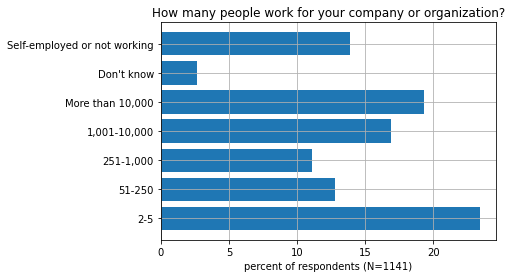

In [12]:
preferred_order = [2,3,4,0,1,5,6]
plot(c, 'How many people work for your company or organization?', preferred_order)

49. Category that most defines your role

In [13]:
c = access_mc_question(49)
print(c.keys())

['Multiple choice response.24']
dict_keys(['Developer or software engineer', 'C-level (non-technology) management', 'IT management, including CIO, CISO, CTO', 'Marketing / PR', 'Community manager or developer advocate', 'Other IT', 'Other'])


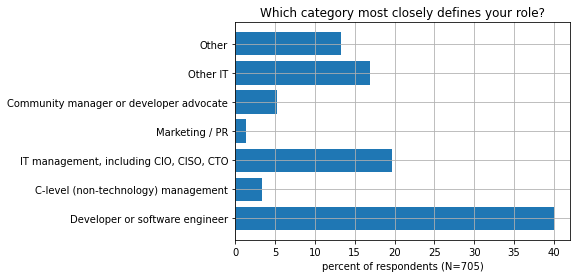

In [14]:
plot(c, 'Which category most closely defines your role?')

Note: The sample sizes don't match https://raw.githubusercontent.com/todogroup/osposurvey/master/2021/results_2021.pdf

50. What industry?

In [15]:
c = access_mc_question(50)
print(c.keys())

['Multiple choice response.25']
dict_keys(['Technology (software or IT)', 'Telecom, communications or media', 'Financial services', 'Other', 'Education: Other', 'Transportation and automotive', 'Retail', 'Education: University', 'Healthcare', 'Manufacturing and raw materials', 'Public Sector: Non-governmental organization', 'Defense', 'Public Sector: National government', 'Utilities', 'Public Sector: Local government', 'Public Sector: International government', 'Education: For-profit services', 'Insurance'])


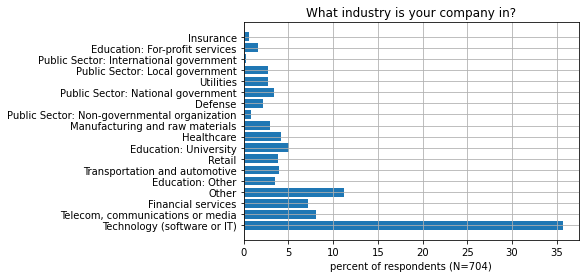

In [16]:
plot(c, 'What industry is your company in?')

1. Where is your company or organization on its open source journey?

In [17]:
c = access_multiple_row_question(1)

['Consuming open source code in products or services'
 'Contributing to upstream open source projects'
 'Influencing open source projects via leadership or maintainer roles'
 'Initiating or releasing open source projects'
 'Collaborating with peers across open source projects and/or foundations'
 'Not involved in open source' "Don't know"]


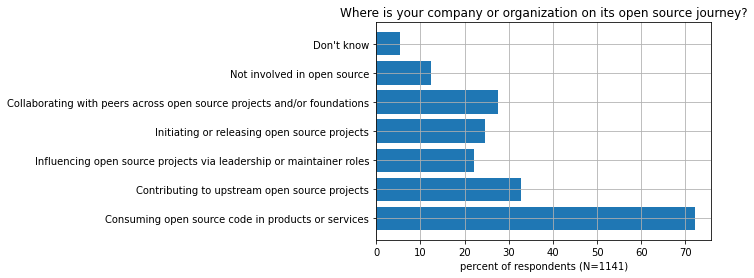

In [18]:
plot(c, 'Where is your company or organization on its open source journey?', N=len(df))